In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data=pd.read_csv('/content/drive/My Drive/Projects/E-commerce/data.csv',encoding = 'ISO-8859-1')

In [58]:
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Total amount,month,year,day,Weekday
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30,12,2010,1,2
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,12,2010,1,2
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00,12,2010,1,2
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,12,2010,1,2
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,12,2010,1,2


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


#### Data Preprocessing

In [5]:
# check missing values for each column 
data.isnull().sum().sort_values()


InvoiceNo           0
StockCode           0
Quantity            0
InvoiceDate         0
UnitPrice           0
Country             0
Description      1454
CustomerID     135080
dtype: int64

In [6]:
#checking data types of all the columns
print (data.dtypes)

InvoiceNo       object
StockCode       object
Description     object
Quantity         int64
InvoiceDate     object
UnitPrice      float64
CustomerID     float64
Country         object
dtype: object


In [7]:
data['InvoiceDate'] = pd.to_datetime(data.InvoiceDate, format='%m/%d/%Y %H:%M')

In [8]:
data.CustomerID = data.CustomerID.astype(object)


In [9]:
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom


In [10]:
data[data.isnull().any(axis=1)].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 135080 entries, 622 to 541540
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    135080 non-null  object        
 1   StockCode    135080 non-null  object        
 2   Description  133626 non-null  object        
 3   Quantity     135080 non-null  int64         
 4   InvoiceDate  135080 non-null  datetime64[ns]
 5   UnitPrice    135080 non-null  float64       
 6   CustomerID   0 non-null       object        
 7   Country      135080 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(5)
memory usage: 9.3+ MB


In [11]:
data[data['Description'].isnull()]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
622,536414,22139,NaN,56,2010-12-01 11:52:00,0.0,NaN,United Kingdom
1970,536545,21134,NaN,1,2010-12-01 14:32:00,0.0,NaN,United Kingdom
1971,536546,22145,NaN,1,2010-12-01 14:33:00,0.0,NaN,United Kingdom
1972,536547,37509,NaN,1,2010-12-01 14:33:00,0.0,NaN,United Kingdom
1987,536549,85226A,NaN,1,2010-12-01 14:34:00,0.0,NaN,United Kingdom
...,...,...,...,...,...,...,...,...
535322,581199,84581,NaN,-2,2011-12-07 18:26:00,0.0,NaN,United Kingdom
535326,581203,23406,NaN,15,2011-12-07 18:31:00,0.0,NaN,United Kingdom
535332,581209,21620,NaN,6,2011-12-07 18:35:00,0.0,NaN,United Kingdom
536981,581234,72817,NaN,27,2011-12-08 10:33:00,0.0,NaN,United Kingdom


#### It is observed that where there is a missing Description and CustomerID the unitprice = 0 and the quantity is either positive or negative. So we can drop these rows


In [12]:
data=data.dropna()
data.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

#### Now there are no nulls

In [13]:
data.describe()

,Quantity,UnitPrice
count,406829.000000,406829.000000
mean,12.061303,3.460471
std,248.693370,69.315162
min,-80995.000000,0.000000
25%,2.000000,1.250000
50%,5.000000,1.950000
75%,12.000000,3.750000
max,80995.000000,38970.000000


#### We see that quantity is negative and unit price is 0 which is not possible. So removing these rows

In [14]:
data = data[data.Quantity > 0]

#### Adding Total amount as a new column

In [15]:
data['Total amount']= data['Quantity']*data['UnitPrice']

In [16]:
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Total amount
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34


#### Insights

Top 10 Products

In [17]:
Top_desc=data.Description.value_counts().sort_values(ascending=False).iloc[0:10]
Top_desc

WHITE HANGING HEART T-LIGHT HOLDER    2028
REGENCY CAKESTAND 3 TIER              1724
JUMBO BAG RED RETROSPOT               1618
ASSORTED COLOUR BIRD ORNAMENT         1408
PARTY BUNTING                         1397
LUNCH BAG RED RETROSPOT               1316
SET OF 3 CAKE TINS PANTRY DESIGN      1159
LUNCH BAG  BLACK SKULL.               1105
POSTAGE                               1099
PACK OF 72 RETROSPOT CAKE CASES       1068
Name: Description, dtype: int64

Text(0.5, 1.0, 'Top 10 Products')

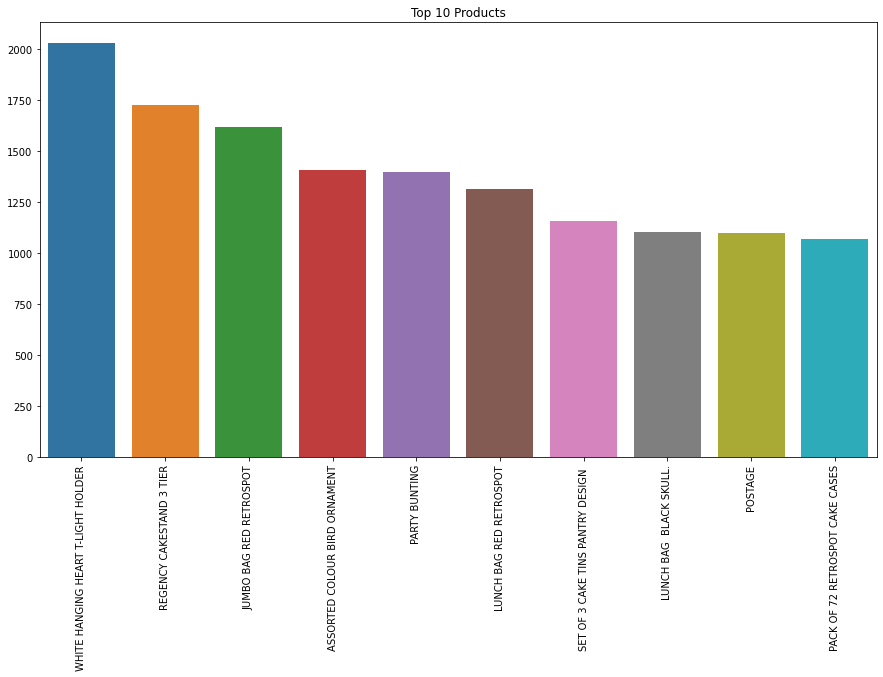

In [18]:
plt.figure(figsize=(15,8))
sns.barplot(y= Top_desc.values, x= Top_desc.index)
plt.xticks(rotation=90)
plt.title('Top 10 Products')

In [19]:
data['month'] = pd.DatetimeIndex(data['InvoiceDate']).month
data['year'] = pd.DatetimeIndex(data['InvoiceDate']).year
data['day'] = pd.DatetimeIndex(data['InvoiceDate']).day
data['Weekday'] = pd.DatetimeIndex(data['InvoiceDate']).weekday

data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Total amount,month,year,day,Weekday
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30,12,2010,1,2
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,12,2010,1,2
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00,12,2010,1,2
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,12,2010,1,2
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,12,2010,1,2


Text(0.5, 1.0, 'month vs orders')

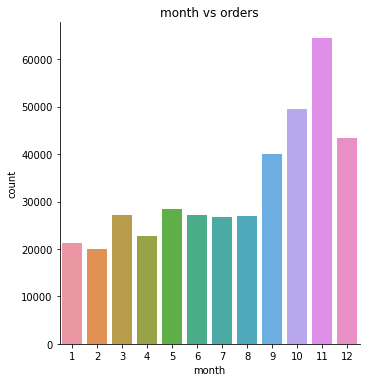

In [20]:
sns.catplot(data=data, x= 'month', kind = 'count')
plt.title('month vs orders')

Text(0.5, 1.0, 'month vs sales')

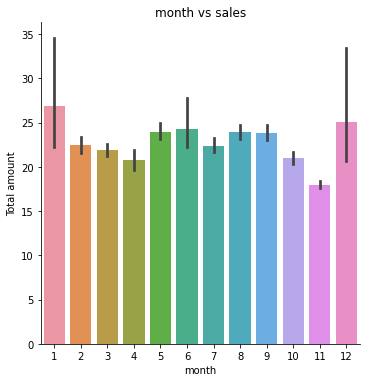

In [21]:
sns.catplot(data=data, x= 'month',y='Total amount', kind = 'bar')
plt.title('month vs sales')

Text(0.5, 1.0, 'day of the week vs sales')

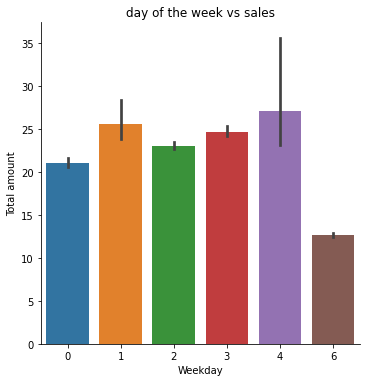

In [22]:
sns.catplot(data=data, x= 'Weekday',y='Total amount', kind = 'bar')
plt.title('day of the week vs sales')

In [23]:
Top_country=data.Country.value_counts().sort_values(ascending=False).iloc[0:10]
Top_country

United Kingdom    354345
Germany             9042
France              8342
EIRE                7238
Spain               2485
Netherlands         2363
Belgium             2031
Switzerland         1842
Portugal            1462
Australia           1185
Name: Country, dtype: int64

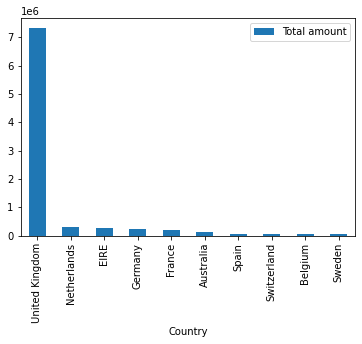

In [25]:
df_flat = data.groupby(['Country'])['Total amount'].sum().reset_index()
df_flat.sort_values(['Total amount'], ascending=False).head(10).plot(kind='bar', y='Total amount', x='Country')


#### Insights from EDA:
1)Sales are at peak in the month of January and December.

2)Sales are at peak on Friday and Saturday is off day.

3)Sales in United Kingdom is the most.

#### checking sales in UK Vs other countries

In [26]:
uk_count = data[data['Country'] == 'United Kingdom']['Country'].count()
all_count = data['Country'].count()
uk_perc = uk_count/all_count
print(str('{0:.2f}%').format(uk_perc*100))

89.05%


#### 89% of sales are in UK.

In [27]:
data_uk = data[data['Country']=='United Kingdom']

#### RFM
To get the RFM score of a customer, 

calculate Recency = number of days since last purchase

calculate Freqency = number of purchases during the studied period (usually one year)

calculate Monetary = total amount of purchases made during the studied period



#### Recency

In [28]:
data_uk['InvoiceDate'].max()

Timestamp('2011-12-09 12:49:00')

In [29]:
import datetime as dt
now = dt.date(2011,12,9)
print(now)

2011-12-09


In [30]:
data_uk['date'] = pd.DatetimeIndex(data_uk['InvoiceDate']).date

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [31]:
#group by customers and check last date of purshace
recency_df = data_uk.groupby(by='CustomerID', as_index=False)['date'].max()
recency_df.columns = ['CustomerID','LastPurshaseDate']
recency_df.head()

,CustomerID,LastPurshaseDate
0,12346.0,2011-01-18
1,12747.0,2011-12-07
2,12748.0,2011-12-09
3,12749.0,2011-12-06
4,12820.0,2011-12-06


In [32]:
#calculating Recency
recency_df['Recency']=recency_df['LastPurshaseDate'].apply(lambda x: (now-x).days)
recency_df.head()

,CustomerID,LastPurshaseDate,Recency
0,12346.0,2011-01-18,325
1,12747.0,2011-12-07,2
2,12748.0,2011-12-09,0
3,12749.0,2011-12-06,3
4,12820.0,2011-12-06,3


In [33]:
#drop LastPurchaseDate
recency_df.drop('LastPurshaseDate',axis=1,inplace=True)

#### Frequency

In [34]:
data_uk_c= data_uk
data_uk_c.drop_duplicates(subset=['InvoiceNo','CustomerID'], keep="first", inplace=True)
frequency_df= data_uk_c.groupby(by=['CustomerID'],as_index=False)['InvoiceNo'].count()
frequency_df.columns=['CustomerID', 'Frequency']
frequency_df.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,CustomerID,Frequency
0,12346.0,1
1,12747.0,11
2,12748.0,210
3,12749.0,5
4,12820.0,4


#### Monetary

In [35]:
monetary_df=data_uk_c.groupby(by=['CustomerID'],as_index=False).agg({'Total amount' : 'sum' })
monetary_df.columns=['CustomerID', 'Monetary']
monetary_df.head()

,CustomerID,Monetary
0,12346.0,77183.60
1,12747.0,689.49
2,12748.0,3841.31
3,12749.0,98.35
4,12820.0,58.20


In [36]:
temp_df = recency_df.merge(frequency_df,on='CustomerID')
rfm = temp_df.merge(monetary_df,on='CustomerID')
#use CustomerID as index
rfm.set_index('CustomerID',inplace=True)
rfm.head()


,Recency,Frequency,Monetary
CustomerID,,,
12346.0,325,1,77183.60
12747.0,2,11,689.49
12748.0,0,210,3841.31
12749.0,3,5,98.35
12820.0,3,4,58.20


In [37]:
quantiles = rfm.quantile(q=[0.25,0.5,0.75])
quantiles

,Recency,Frequency,Monetary
0.25,17.0,1.0,17.7
0.50,50.0,2.0,45.4
0.75,142.0,5.0,124.5


In [38]:
quantiles.to_dict()

{'Frequency': {0.25: 1.0, 0.5: 2.0, 0.75: 5.0},
 'Monetary': {0.25: 17.700000000000003, 0.5: 45.4, 0.75: 124.50000000000001},
 'Recency': {0.25: 17.0, 0.5: 50.0, 0.75: 142.0}}

In [39]:
def Rscore(x,p,d):
  if x <= d[p][0.25]:
    return 4
  elif x<= d[p][0.5]:
    return 3
  elif x <= d[p][0.75]:
    return 2
  else:
    return 1

def FMScore(x,p,d):
    if x <= d[p][0.25]:
        return 1
    elif x <= d[p][0.50]:
        return 2
    elif x <= d[p][0.75]: 
        return 3
    else:
        return 4
  

In [40]:
#create rfm segmentation table
rfm_segmentation = rfm
rfm_segmentation['R_Quartile'] = rfm_segmentation['Recency'].apply(Rscore, args=('Recency',quantiles,))
rfm_segmentation['F_Quartile'] = rfm_segmentation['Frequency'].apply(FMScore, args=('Frequency',quantiles,))
rfm_segmentation['M_Quartile'] = rfm_segmentation['Monetary'].apply(FMScore, args=('Monetary',quantiles,))

rfm_segmentation.head()

,Recency,Frequency,Monetary,R_Quartile,F_Quartile,M_Quartile
CustomerID,,,,,,
12346.0,325,1,77183.60,1,1,4
12747.0,2,11,689.49,4,4,4
12748.0,0,210,3841.31,4,4,4
12749.0,3,5,98.35,4,3,3
12820.0,3,4,58.20,4,3,3


In [41]:
rfm_segmentation['RFMScore'] = rfm_segmentation.R_Quartile.map(str)\
                            + rfm_segmentation.F_Quartile.map(str)\
                            + rfm_segmentation.M_Quartile.map(str)
rfm_segmentation.head()

,Recency,Frequency,Monetary,R_Quartile,F_Quartile,M_Quartile,RFMScore
CustomerID,,,,,,,
12346.0,325,1,77183.60,1,1,4,114
12747.0,2,11,689.49,4,4,4,444
12748.0,0,210,3841.31,4,4,4,444
12749.0,3,5,98.35,4,3,3,433
12820.0,3,4,58.20,4,3,3,433


#### Customers in each segment

In [42]:
print("Best Customers:", len(rfm_segmentation[rfm_segmentation['RFMScore']=='444']))
print('Loyal Customers: ',len(rfm_segmentation[rfm_segmentation['F_Quartile']==4]))
print("Big Spenders: ",len(rfm_segmentation[rfm_segmentation['M_Quartile']==4]))
print('Almost Lost: ', len(rfm_segmentation[rfm_segmentation['RFMScore']=='244']))
print('Lost Customers: ',len(rfm_segmentation[rfm_segmentation['RFMScore']=='144']))
print('Lost Cheap Customers: ',len(rfm_segmentation[rfm_segmentation['RFMScore']=='111']))

Best Customers: 370
Loyal Customers:  791
Big Spenders:  980
Almost Lost:  65
Lost Customers:  11
Lost Cheap Customers:  377


#### Forecasting

In [43]:
data_t = data.groupby('InvoiceDate')['Total amount'].sum().reset_index()
data_t

,InvoiceDate,Total amount
0,2010-12-01 08:26:00,139.12
1,2010-12-01 08:28:00,22.20
2,2010-12-01 08:34:00,348.78
3,2010-12-01 08:35:00,17.85
4,2010-12-01 08:45:00,855.86
...,...,...
17281,2011-12-09 12:23:00,124.60
17282,2011-12-09 12:25:00,140.64
17283,2011-12-09 12:31:00,329.05
17284,2011-12-09 12:49:00,339.20


In [44]:
data_t = data_t.set_index('InvoiceDate')
data_t

,Total amount
InvoiceDate,
2010-12-01 08:26:00,139.12
2010-12-01 08:28:00,22.20
2010-12-01 08:34:00,348.78
2010-12-01 08:35:00,17.85
2010-12-01 08:45:00,855.86
...,...
2011-12-09 12:23:00,124.60
2011-12-09 12:25:00,140.64
2011-12-09 12:31:00,329.05


In [45]:
y = data_t['Total amount'].resample('M').mean()
y

InvoiceDate
2010-12-31    442.934176
2011-01-31    604.506412
2011-02-28    462.396432
2011-03-31    469.267738
2011-04-30    434.444779
2011-05-31    472.558886
2011-06-30    502.824099
2011-07-31    478.541476
2011-08-31    532.901652
2011-09-30    590.724353
2011-10-31    579.977003
2011-11-30    482.282017
2011-12-31    735.025234
Freq: M, Name: Total amount, dtype: float64

#### Visualizing Sales Time Series Data

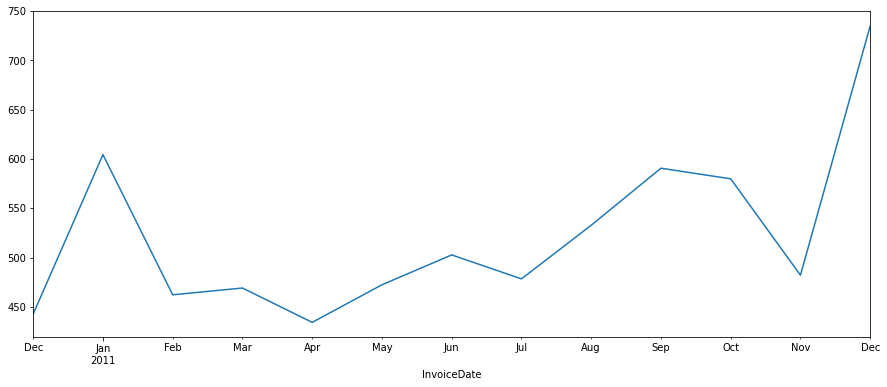

In [46]:
y.plot(figsize=(15, 6))
plt.show()

#### We can also visualize our data using a method called time-series decomposition that allows us to decompose our time series into three distinct components: trend, seasonality, and noise.

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


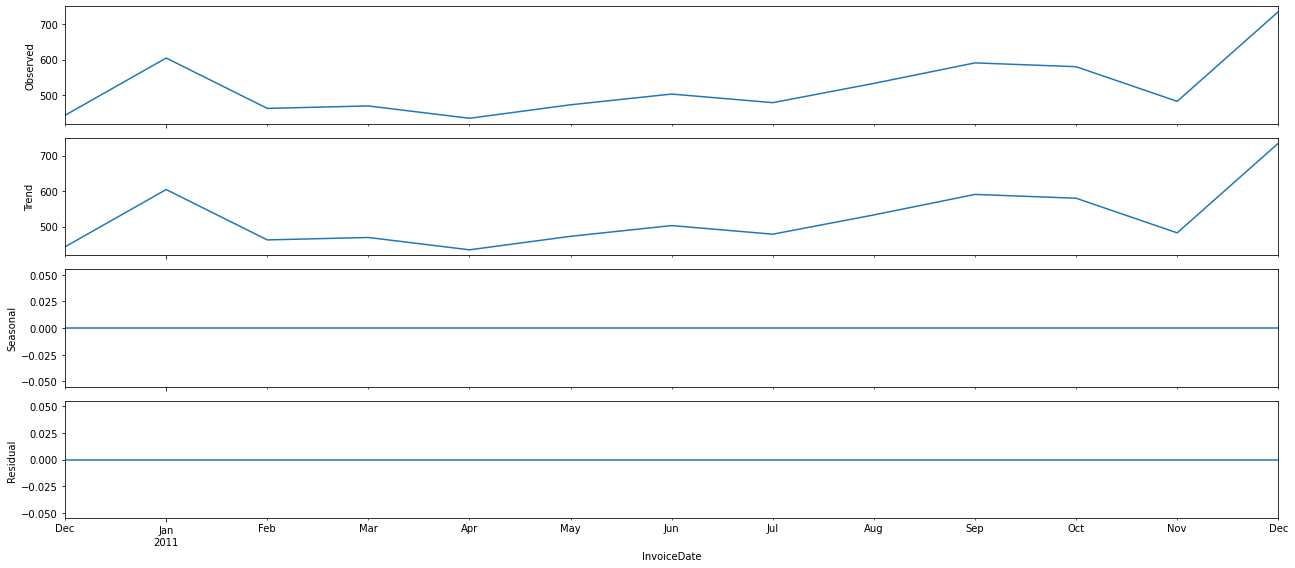

In [47]:
import statsmodels.api as sm
from pylab import rcParams
rcParams['figure.figsize'] = 18, 8
decomposition = sm.tsa.seasonal_decompose(y, model='additive', freq=1)
fig = decomposition.plot()
plt.show()

In [48]:
from statsmodels.tsa.stattools import adfuller
test_result=adfuller(data_t['Total amount'])

In [49]:
#Ho: It is non stationary
#H1: It is stationary

def adfuller_test(sales):
    result=adfuller(sales)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")

In [50]:
adfuller_test(data_t['Total amount'])

ADF Test Statistic : -128.88851726617793
p-value : 0.0
#Lags Used : 0
Number of Observations Used : 17285
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


In [55]:
#p=1, d=1, q=0 or 1
from statsmodels.tsa.arima_model import ARIMA

model=ARIMA(data_t['Total amount'],order=(1,1,0))
model_fit=model.fit()

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


In [56]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:         D.Total amount   No. Observations:                17285
Model:                 ARIMA(1, 1, 0)   Log Likelihood             -156951.340
Method:                       css-mle   S.D. of innovations           2124.429
Date:                Sun, 18 Oct 2020   AIC                         313908.680
Time:                        20:31:37   BIC                         313931.953
Sample:                             1   HQIC                        313916.348
                                                                              
========================================================================================
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.0064     10.812      0.001      1.000     -21.184      21.197
ar.L1.D.Total amount    -0.4946      0.007    -74.818      0.000      -0.508      -0.482
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -2.0219           +0.0000j            2.0219            0.5000
-----------------------------------------------------------------------------
"""

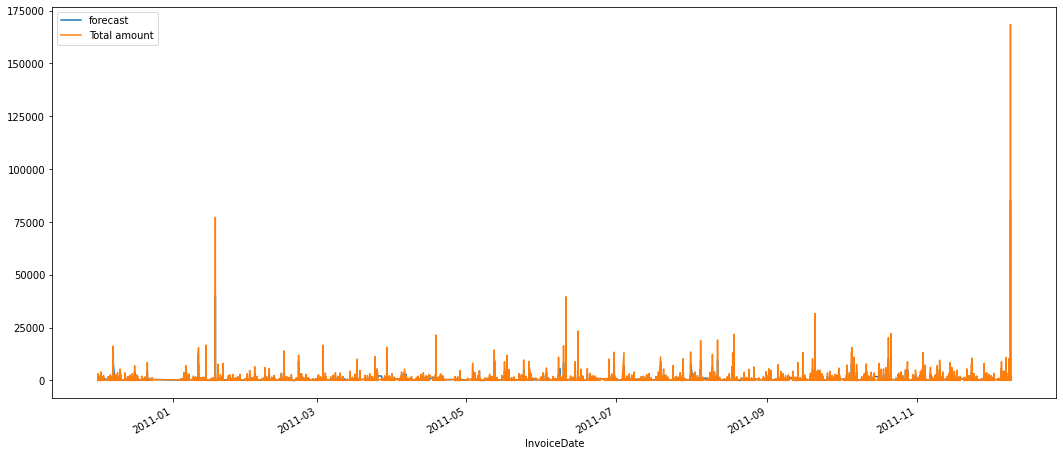

In [57]:
model_fit.plot_predict(dynamic=False)
plt.show()